#### Installs ----- commented in or out and restart kernel after completed

In [1]:
# !pip install openai
# !pip install --upgrade openai
# !pip install --upgrade pip
# !pip install GitPython
# !pip install beautifulsoup4

# image processing
# !pip install pillow
# !pip install pydantic

#### <u><b>Libraries</u></b>

In [2]:
from getpass import getpass
from openai import OpenAI
import os
from git import Repo
#used for setting up paths and parent dir to github repository
from pathlib import Path
import shutil
from bs4 import BeautifulSoup as Soup
from PIL import Image

from datetime import datetime as dt # for formatting date returned with images
import requests                # for downloading images from URLs

#### Set Folders

In [3]:
#git repo folder - the folder that holds the changes and commits
PATH_TO_BLOG_REPO = Path('C:\\Users\\DARiN\\Documents\\Python-JL\\Github\\caliskate.github.io\\.git')
#main folder to inject the index.html files
PATH_TO_BLOG = PATH_TO_BLOG_REPO.parent
#content subfolder where we will put the blog content
PATH_TO_CONTENT = PATH_TO_BLOG/"content"
#creates content folder
PATH_TO_CONTENT.mkdir(exist_ok=True,parents=True)

#### <u><b>Set API</u></b>

In [4]:
inputuser=input('enter your OpenAI username: ')
os.environ["OPENAI_API_KEY"] = getpass('enter your OpenAI API key: ')

enter your OpenAI username:  caliskate04
enter your OpenAI API key:  ········


In [5]:
client = OpenAI(api_key=os.environ['OPENAI_API_KEY'])

#### Define Git Push

In [6]:
def update_blog(commit_message='Updates blog - cleaned up notebook, added username input'):
        #tells GitPython the Repo Location
        repo = Repo(PATH_TO_BLOG_REPO)
        #git add . (everything)
        repo.git.add(all=True)
        #git commit with some message (-m) "updates blog"
        repo.index.commit(commit_message)
        #git push
        origin = repo.remote(name='origin')
        origin.push()

#### Create Blog Function Defined Here

In [7]:
def create_new_blog(title,content,cover_image):
    cover_image = Path(cover_image)

    files = len(list(PATH_TO_CONTENT.glob("*.html")))     #grab all html files and count them
    new_title = f"{files+1}.html" #creates file and folder name by counting up by 1
    path_to_new_content = PATH_TO_CONTENT/new_title #getting the file and making sure in correct dir
    
    shutil.copy(cover_image,PATH_TO_CONTENT) #checks to make sure file name does not exist - prevents error or overwriting existing files
    print(new_title)
    if not os.path.exists(path_to_new_content):
        #write a new html file
        with open(path_to_new_content,"w") as f:
            #write commands for each line of the blog
            #write head of html open and close
            f.write("<!DOCTYPE HTML>\n")
            f.write("<html>\n")
            f.write("<head>\n")
            f.write(f"<title>{title}</title>\n")
            f.write("</head>\n")
            #write body open and close with title, image and content
            f.write("<body>\n")
            f.write(f"<img src='{cover_image.name}' alt='Cover Image'> <br />\n")
            f.write(f"<h1> {title} </h1>")
            #open ai provides \n but we also want to replace that to include break calls
            f.write(content.replace("\n", "<br />\n"))
            f.write("</body>\n")
            f.write("</html>\n")
            print('Blog Created')
            return path_to_new_content
    else:
            raise FileExistsError("File name already exists")

In [8]:
#get an index that lists all of the blog posts
with open(PATH_TO_BLOG/"index.html") as index:
    soup = Soup(index.read())

str(soup)

'<html lang="en">\n<head>\n<meta charset="utf-8"/>\n<meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n<title>\n   Document\n  </title>\n</head>\n<body>\n<h1>\n   My BLOG Home page\n  </h1>\n<a href="index.html">\n   Home\n  </a>\n<a href="content\\4.html">\n   4\n  </a>\n<a href="content\\5.html">\n   5\n  </a>\n<a href="content\\6.html">\n   6\n  </a>\n<a href="content\\7.html">\n   7\n  </a>\n<a href="content\\8.html">\n   8\n  </a>\n<a href="content\\9.html">\n   9\n  </a>\n<a href="content\\10.html">\n   10\n  </a>\n<a href="content\\11.html">\n   11\n  </a>\n<a href="content\\12.html">\n   12\n  </a>\n<a href="content\\13.html">\n   13\n  </a>\n<a href="content\\14.html">\n   14\n  </a>\n<a href="content\\15.html">\n   15\n  </a>\n<a href="content\\16.html">\n   16\n  </a>\n<a href="content\\17.html">\n   17\n  </a>\n<a href="content\\18.html">\n   18\n  </a>\n<a href="content\\19.html">\n   19\n  </a>\n<a href="content\\22.html">\n   22\n  </a>\n<a href="co

In [9]:
#check for duplicate links, using href (the anchor tag for index.html)
def check_for_duplicate_links(path_to_new_content, links):
    urls = [str(link.get("href")) for link in links] #1.html,2.html,3.html
    content_path=str(Path(*path_to_new_content.parts[-2:])) # checks for index of 2 until the end ... would look like C:/UIsers/marci/file.../1.html
    return content_path in urls

In [10]:
def write_to_index(path_to_new_content):
    with open(PATH_TO_BLOG/'index.html') as index:
        soup = Soup(index.read()) #looks for all anchor tags then finds the last link
        
    links = soup.find_all('a')
    last_link = links[-1]

    if check_for_duplicate_links(path_to_new_content,links):
        raise ValueError("Link already exists!")
        # a lot of this takes advantage of what beautiful soup already has, need to familiarize what is has if you're working with html and the web
        #finds the path to the new content
    link_to_new_blog = soup.new_tag("a",href=Path(*path_to_new_content.parts[-2:]))
        #convert the path into a string and instert into a new blog
    link_to_new_blog.string = path_to_new_content.name.split('.')[0]
    last_link.insert_after(link_to_new_blog)

    with open(PATH_TO_BLOG/'index.html','w') as f:
        f.write(str(soup.prettify(formatter='html'))) #prettify with separate long string into new lines

#### Defining Text Prompt

In [11]:
def create_prompt(title):
    prompt="""
    Biography:
    My name is Darin and I am a Python student.

    Blog
    Title: {}
    tags: tech, python, coding, AI, machine learning
    Summary: I learn about what Python can hold for the future of AI. Please do not exceed 2 paragraphs in total response length.
    Full text: """.format(title) #070224 added 'Do not exceed 2 paragraphs.' based on max token length of 250
    return prompt

title = "Python and the Future of AI" #fixed format 070224
print(create_prompt(title))


    Biography:
    My name is Darin and I am a Python student.

    Blog
    Title: Python and the Future of AI
    tags: tech, python, coding, AI, machine learning
    Summary: I learn about what Python can hold for the future of AI. Please do not exceed 2 paragraphs in total response length.
    Full text: 


#### Chat GPT 3.5 API call - (rerun from here to create new blog)

In [12]:
#new format 
client = OpenAI()

completion=client.completions.create(
                model='gpt-3.5-turbo-instruct',
                prompt=create_prompt(title),
                max_tokens=250, #length of output
                temperature=0.7, # 0 to 1, only change top p or temperature , 0 is the most probable, 1 takes more risks
                top_p = 1.0, #only change top p or temperature, 1 is default, 0.1 is top 10% most probable
                frequency_penalty=0, #-2 to 2, positive value penalizes new tokens if they exist, decreaseing probabiolity of repeating text
                presence_penalty=0, #-2 to 2, positive penalize new tokens if they appear, but thinks about tokens, value too high creates low probability
                n = 1, #number or results to be rewturned, 1 is default, use when temp is zero to min repeating results
                # stop = ['/n'],
)         
blog_content=completion.choices[0].text
print(blog_content)


Python has become one of the most popular programming languages in the world, and for good reason. It is versatile, easy to learn, and has a wide range of applications. One of the most exciting areas where Python is making a huge impact is in the field of artificial intelligence (AI). With its powerful libraries and frameworks such as TensorFlow and PyTorch, Python has become the go-to language for building and training AI models.

One of the main reasons why Python is so well-suited for AI is its simplicity. Its syntax is easy to understand and read, making it accessible to both beginner and experienced programmers. This has led to a large community of developers constantly working to improve and expand upon Python's capabilities in the AI realm. With the increasing demand for AI solutions in various industries, Python's popularity is only expected to grow, cementing its place as the language of choice for AI development. As advancements in AI continue to push the boundaries of what 

#### Defining Image Prompt

In [13]:
print(blog_content)


Python has become one of the most popular programming languages in the world, and for good reason. It is versatile, easy to learn, and has a wide range of applications. One of the most exciting areas where Python is making a huge impact is in the field of artificial intelligence (AI). With its powerful libraries and frameworks such as TensorFlow and PyTorch, Python has become the go-to language for building and training AI models.

One of the main reasons why Python is so well-suited for AI is its simplicity. Its syntax is easy to understand and read, making it accessible to both beginner and experienced programmers. This has led to a large community of developers constantly working to improve and expand upon Python's capabilities in the AI realm. With the increasing demand for AI solutions in various industries, Python's popularity is only expected to grow, cementing its place as the language of choice for AI development. As advancements in AI continue to push the boundaries of what 

In [14]:
def dalle3_prompt(title):
    prompt=f"Sci-fi art showing a movie scene with {title}, extremely detailed and mesmerizing."
    return prompt #added extremely detailed and mesmerizing 070224
image_prompt=dalle3_prompt(title)

#### Dalle3 API Call

In [35]:
client = OpenAI()  # will use environment variable "OPENAI_API_KEY"

prompt = image_prompt

image_params = {
 "model": "dall-e-3",  # Defaults to dall-e-2
 "n": 1,               # Between 2 and 10 is only for DALL-E 2
 "size": "1024x1024",  # 256x256, 512x512 only for DALL-E 2 - not much cheaper - 1024x1024, 1024x1792 or 1792x1024 available for DALL-E 3
 "prompt": prompt,     # DALL-E 3: max 4000 characters, DALL-E 2: max 1000
 "user": inputuser,     # pass a customer ID to OpenAI for abuse monitoring
}
images_response = client.images.generate(**image_params)

In [36]:
#naming and saving image
dname = dt.now().strftime('%m-%d-%Y %H:%M:%S').replace("-",'').replace(":",'').replace(' ','-')
img_filename = 'BLOG-image_' + dname +'.png'

#grabs the url from the model_dump and adds it to empty list
image_url_list=[]
for item in images_response.data:
    image_url_list.append(item.model_dump()["url"])
    
#grabs string from the list
image_url=item.model_dump()["url"]

#downloading image from url
with open(img_filename,'wb') as f:
    shutil.copyfileobj(requests.get(image_url, stream=True).raw, f)
print(img_filename,'downloaded')

BLOG-image_07022024-230942.png downloaded


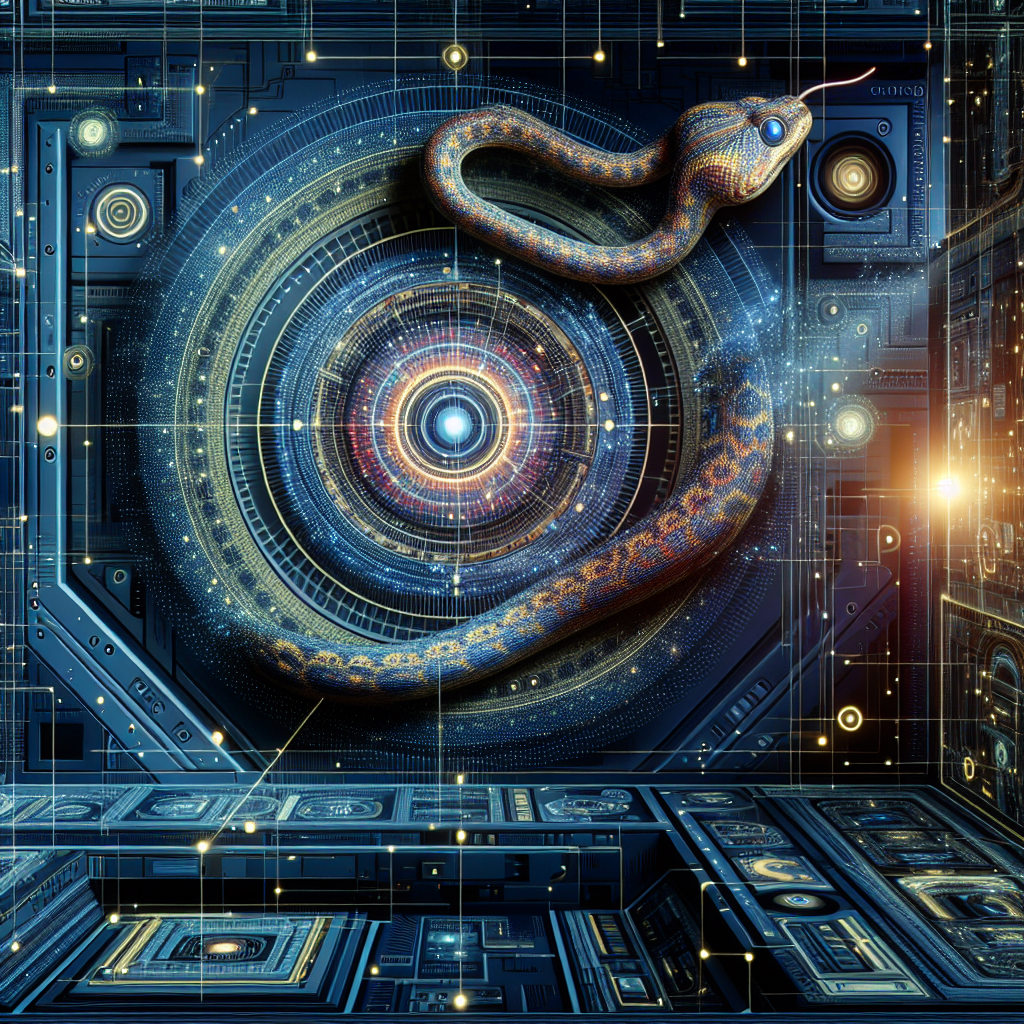

In [37]:
#check image - rerun DALLE API not unsatisfied
Image.open(img_filename)

In [17]:
#defining new path
#combine create blog! - added new auto filename 070224
path_to_new_content=create_new_blog(title,blog_content, img_filename)
write_to_index(path_to_new_content)

28.html
Blog Created


In [18]:
#push to github
update_blog()